In [16]:
# Pandas
import pandas as pd

# Configuração do matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Sklearn e Skforecast
from sklearn.ensemble import RandomForestRegressor

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor


In [17]:
# Leitura do .csv
# Drop de colunas desnecessárias
url = 'Global Electricity Statistics.csv'
pop = pd.read_csv(url, sep=',')
pop = pop.drop(['Features', 'Region'], axis=1) #As colunas 'Features' e 'Region' foram removidas, deixando apenas as colunas 'Country', 'Year'

pop

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,6.683,7.65,8.824,9.615,10.537,11.569,12.214,13.014,14.08,...,53.9845,56.3134,60.39972,64.68244,66.75504,71.49546,72.10903,76.685,72.73591277,77.53072719
1,Angola,0.905,0.906,0.995,1.028,1.028,1.028,1.088,1.097,1.097,...,6.03408,7.97606,9.21666,9.30914,10.203511,10.67604,12.83194,15.4,16.6,16.429392
2,Benin,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.04612,0.08848,0.22666,0.31056,0.26004,0.3115,0.19028,0.2017,0.22608,0.24109728
3,Botswana,0.443,0.502,0.489,0.434,0.445,0.456,0.538,0.846,0.8,...,0.33,0.86868,2.17628,2.79104,2.52984,2.8438,2.97076,3.0469,2.05144,2.18234816
4,Burkina Faso,0.098,0.108,0.115,0.117,0.113,0.115,0.122,0.133,0.143,...,0.86834,0.98268,1.11808,1.43986,1.5509,1.64602,1.6464,1.72552,1.647133174,1.761209666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Trinidad and Tobago,0.244,0.21,0.152,0.326,0.36,0.407,0.337,0.373,0.328,...,0.239,0.234,0.245,0.248,0.253,0.274864,0.425807,0.424101,0.422757,0.422757
1606,Turks and Caicos Islands,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,...,0,0,0,0,0,0.014,0.0125,0.0125,0.0125,0.01277172
1607,U.S. Virgin Islands,0.05243,0.05537,0.05607,0.05761,0.05789,0.05922,0.06055,0.06335,0.06384,...,0.063,0.06,0.06,0.06,0.065,0.065,0.05,0.051,0.051,0.051
1608,Uruguay,0.55,0.426,0.627,0.662,0.78,0.702,0.911,1.063,1.034,...,1.292,1.282,1.253,1.49,1.608,1.694491,1.557257,1.322331,1.129273,1.129273


In [18]:
pop['Country'] = pop['Country'].str.replace(r'\s+', '', regex=True)  # Remove espaços em branco
pop['Country'] = pop['Country'].str.replace(r'[^A-Za-z0-9]+', '', regex=True) #Esta linha de código remove todos os caracteres não alfanuméricos

In [19]:
# Dados sobre eletricidade do Brasil
data = pop[pop['Country'] == 'Brazil']
data = data.drop(['Country'], axis=1)
data = pd.melt(data, var_name='Data', value_name='Brasil')
data

,Data,Brasil
0,1980,138.3018
1,1980,121.7838
2,1980,0.142
3,1980,0.196
4,1980,-0.054
...,...,...
289,2021,23.147
290,2021,0.044
291,2021,23.103
292,2021,204.999


In [21]:
# Juntando com os dados de Marrocos
Morocco = pop[pop['Country'] == 'Morocco']
Morocco = Morocco.drop(['Country'], axis=1)
Morocco= pd.melt(Morocco, var_name='date', value_name='Morocco')
data['Morocco'] = Morocco['Morocco']


data

,Data,Brasil,Morocco
0,1980,138.3018,4.921
1,1980,121.7838,4.409
2,1980,0.142,0
3,1980,0.196,0
4,1980,-0.054,0
...,...,...,...
289,2021,23.147,1.825306484
290,2021,0.044,0.851
291,2021,23.103,0.974306484
292,2021,204.999,14.262


In [22]:
dataset = data.drop_duplicates(subset=['Data'])
dataset

,Data,Brasil,Morocco
0,1980,138.3018,4.921
7,1981,140.1522,5.408
14,1982,150.02646,5.773
21,1983,160.45232,6.269
28,1984,178.0967,6.471
35,1985,190.67138,6.602
42,1986,199.24174,7.272
49,1987,200.44982,7.722
56,1988,211.77926,8.473
63,1989,218.29374,8.594


In [23]:
dataset['Brasil'] = data['Brasil'].astype(float)
dataset['Morocco'] = data['Morocco'].astype(float)
dataset

C:\Users\micha\AppData\Local\Temp\ipykernel_19044\2087957487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Brasil'] = data['Brasil'].astype(float)
C:\Users\micha\AppData\Local\Temp\ipykernel_19044\2087957487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Morocco'] = data['Morocco'].astype(float)


,Data,Brasil,Morocco
0,1980,138.301800,4.921000
7,1981,140.152200,5.408000
14,1982,150.026460,5.773000
21,1983,160.452320,6.269000
28,1984,178.096700,6.471000
35,1985,190.671380,6.602000
42,1986,199.241740,7.272000
49,1987,200.449820,7.722000
56,1988,211.779260,8.473000
63,1989,218.293740,8.594000


In [24]:
# Fazendo o indice anual
dataset['Data'] = pd.to_datetime(dataset['Data'], format='%Y')
dataset = dataset.set_index('Data')
dataset = dataset.asfreq('YS', method='bfill')
dataset = dataset.sort_index()
dataset

C:\Users\micha\AppData\Local\Temp\ipykernel_19044\2278243573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Data'] = pd.to_datetime(dataset['Data'], format='%Y')


,Brasil,Morocco
Data,,
1980-01-01,138.301800,4.921000
1981-01-01,140.152200,5.408000
1982-01-01,150.026460,5.773000
1983-01-01,160.452320,6.269000
1984-01-01,178.096700,6.471000
1985-01-01,190.671380,6.602000
1986-01-01,199.241740,7.272000
1987-01-01,200.449820,7.722000
1988-01-01,211.779260,8.473000


In [25]:
dataset.dtypes

Brasil     float64
Morocco    float64
dtype: object

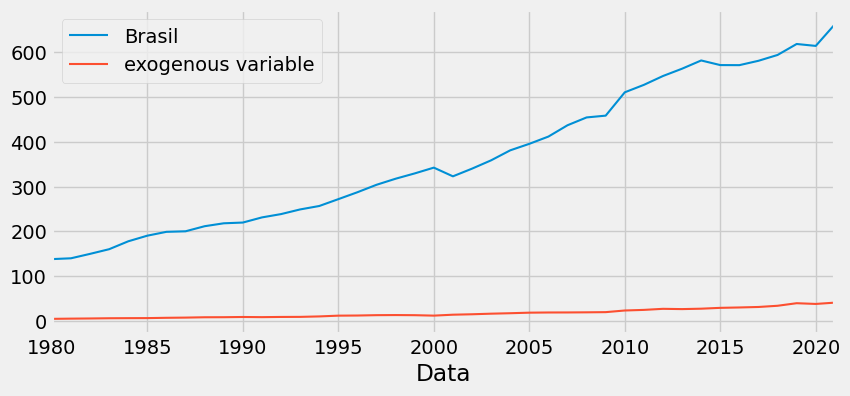

In [26]:
# Plota os dados
fig, ax = plt.subplots(figsize=(9, 4))
dataset['Brasil'].plot(ax=ax, label='Brasil')
dataset['Morocco'].plot(ax=ax, label='exogenous variable')
ax.legend();

In [27]:
print(f'Number of rows with missing values: {dataset.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


In [28]:
# Código para verificar se não existem "buracos" nos dados
(dataset.index == pd.date_range(start=dataset.index.min(),
                             end=dataset.index.max(),
                             freq=dataset.index.freq)).all()

True

Train dates : 1980-01-01 00:00:00 --- 2011-01-01 00:00:00  (n=32)
Test dates  : 2012-01-01 00:00:00 --- 2021-01-01 00:00:00  (n=10)


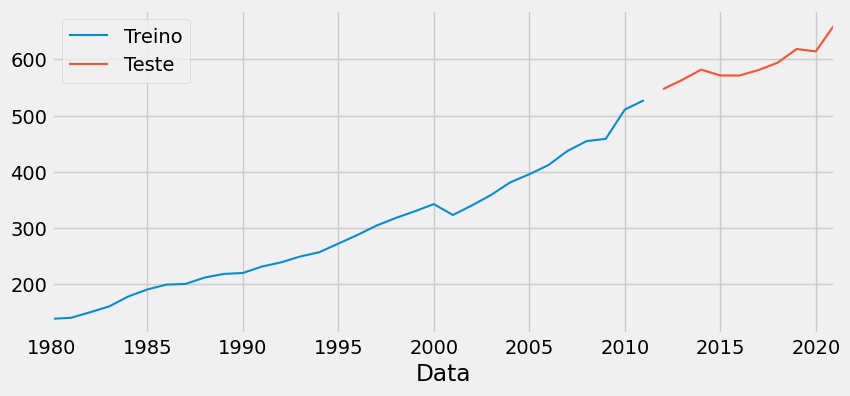

In [29]:
# Divide dados em treinamento e teste
# Para séries temporais, sempre utilizamos os dados mais recentes para teste
steps = 10
dataset_train = dataset[:-steps]
dataset_test  = dataset[-steps:]

print(f"Train dates : {dataset_train.index.min()} --- {dataset_train.index.max()}  (n={len(dataset_train)})")
print(f"Test dates  : {dataset_test.index.min()} --- {dataset_test.index.max()}  (n={len(dataset_test)})")

# Plotando os dados
fig, ax=plt.subplots(figsize=(9, 4))
dataset_train['Brasil'].plot(ax=ax, label='Treino')
dataset_test['Brasil'].plot(ax=ax, label='Teste')
ax.legend();

In [30]:
# Sklearn e Skforecast
from sklearn.ensemble import RandomForestRegressor


from skforecast.ForecasterAutoreg import ForecasterAutoreg


In [31]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg # Esses modelos utilizam valores passados de uma série temporal (lags) para prever valores futuros.


forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(max_depth=10, n_estimators=50, random_state=123),
                lags      = 12 # Número de lags (valores passados da série temporal) 
             )

forecaster.fit(y=dataset_train['Brasil'], exog=dataset_train['Morocco'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(max_depth=10, n_estimators=50, random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
Transformer for y: None 
Transformer for exog: None 
Window size: 12 
Weight function included: False 
Differentiation order: None 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.series.Series'> 
Exogenous variables names: Morocco 
Training range: [Timestamp('1980-01-01 00:00:00'), Timestamp('2011-01-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: YS-JAN 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Cre

In [32]:
steps = 10
predictions = forecaster.predict(steps=steps, exog=dataset_test['Morocco'])
predictions.head(5)

2012-01-01    501.28501
2013-01-01    501.94987
2014-01-01    501.94987
2015-01-01    501.94987
2016-01-01    501.94987
Freq: YS-JAN, Name: pred, dtype: float64

In [33]:
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg

In [34]:
# Tunning
# Usara combinacoes aleatorias dos parametros
# ==============================================================================
from skforecast.model_selection import random_search_forecaster
import numpy as np

forecaster = ForecasterAutoreg(
                 regressor = RandomForestRegressor(random_state=123),
                 lags      = 9 # O valor será substituído durante o tunning
             )

# Valores de lag a testar
lags_grid = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Regressor hyperparameters
param_distributions = {'n_estimators': np.arange(start=10, stop=100, step=1, dtype=int),
                       'max_depth': np.arange(start=5, stop=30, step=1, dtype=int)}

results = random_search_forecaster(
              forecaster           = forecaster,
              y                    = dataset['Brasil'],
              steps                = steps,
              lags_grid            = lags_grid,
              param_distributions  = param_distributions,
              n_iter               = 100,
              metric               = 'mean_squared_error',
              refit                = True,
              initial_train_size   = len(dataset['Brasil']) - steps,
              fixed_train_size     = False,
              return_best          = True,
              random_state         = 123,
              verbose              = False
          )

results

Number of models compared: 900.


lags grid: 100%|██████████| 9/9 [01:27<00:00,  9.78s/it]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5] 
  Parameters: {'n_estimators': 12, 'max_depth': 10}
  Backtesting metric: 5363.78583600565



,lags,lags_label,params,mean_squared_error,n_estimators,max_depth
327,"[1, 2, 3, 4, 5]","[1, 2, 3, 4, 5]","{'n_estimators': 12, 'max_depth': 10}",5363.785836,12,10
334,"[1, 2, 3, 4, 5]","[1, 2, 3, 4, 5]","{'n_estimators': 11, 'max_depth': 14}",5397.096571,11,14
336,"[1, 2, 3, 4, 5]","[1, 2, 3, 4, 5]","{'n_estimators': 10, 'max_depth': 25}",5437.236890,10,25
31,"[1, 2]","[1, 2]","{'n_estimators': 28, 'max_depth': 5}",5905.398512,28,5
89,"[1, 2]","[1, 2]","{'n_estimators': 28, 'max_depth': 11}",5905.398512,28,11
...,...,...,...,...,...,...
746,"[1, 2, 3, 4, 5, 6, 7, 8, 9]","[1, 2, 3, 4, 5, 6, 7, 8, 9]","{'n_estimators': 16, 'max_depth': 8}",10502.517331,16,8
836,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'n_estimators': 10, 'max_depth': 25}",10662.930001,10,25
727,"[1, 2, 3, 4, 5, 6, 7, 8, 9]","[1, 2, 3, 4, 5, 6, 7, 8, 9]","{'n_estimators': 12, 'max_depth': 10}",10720.973370,12,10
734,"[1, 2, 3, 4, 5, 6, 7, 8, 9]","[1, 2, 3, 4, 5, 6, 7, 8, 9]","{'n_estimators': 11, 'max_depth': 14}",11058.997610,11,14


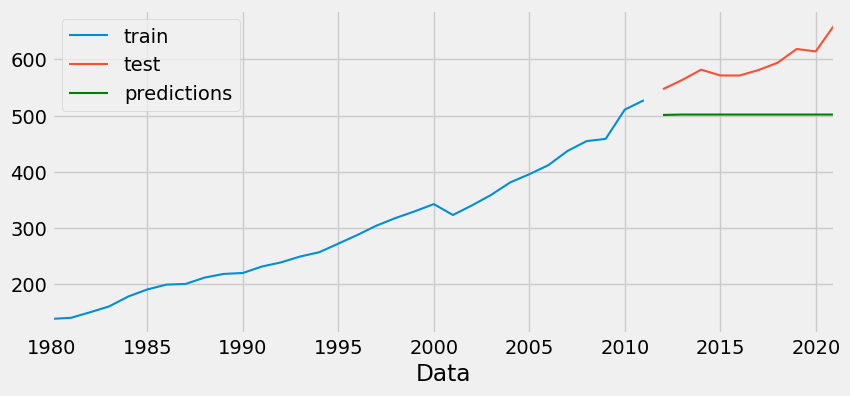

In [35]:
fig, ax=plt.subplots(figsize=(9, 4))
dataset_train['Brasil'].plot(ax=ax, label='train')
dataset_test['Brasil'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions', color='green')
ax.legend();

In [36]:
# Vamos tentar com o ARIMA
%pip install pmdarima

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [37]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [38]:
# O ARIMA vem com um tunning automático, o auto_arima
import numpy.core.multiarray
from pmdarima import *
model = auto_arima(dataset_train['Brasil'], trace=True, error_action='ignore', suppress_warnings=True)
# Treina o modelo
model.fit(dataset_train['Brasil'])
# Previsao
forecast = model.predict(n_periods=len(dataset_test))
# Converte para um datasetframe
forecast = pd.DataFrame(forecast,index = dataset_test.index,columns=['Prediction'])
forecast

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=250.374, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=239.752, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=233.817, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=235.177, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=235.112, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=236.484, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.533 seconds


,Prediction
Data,
2012-01-01,546.699427
2013-01-01,565.996055
2014-01-01,585.292682
2015-01-01,604.589310
2016-01-01,623.885937
2017-01-01,643.182564
2018-01-01,662.479192
2019-01-01,681.775819
2020-01-01,701.072447


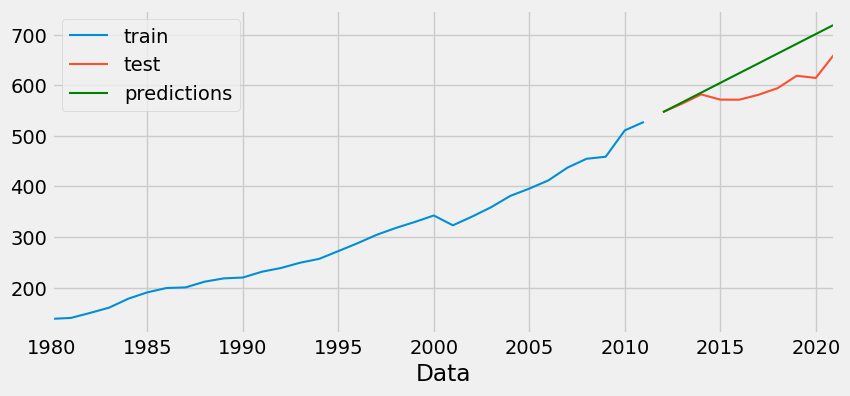

In [39]:
# Plota a predição, comparando com valores reais
fig, ax=plt.subplots(figsize=(9, 4))
dataset_train['Brasil'].plot(ax=ax, label='train')
dataset_test['Brasil'].plot(ax=ax, label='test')
forecast['Prediction'].plot(ax=ax, label='predictions', color='green')
ax.legend();